In [1]:
# This code makes the cell output to include every output, not just the last one.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#Reading the Dataset
data_df = pd.read_csv(r"/content/train.csv")

In [4]:
#Data display
data_df.head(7)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215


In [5]:
#Data shape to know number of rows and columns
data_df.shape

(550068, 12)

This dataset has 12 columns and 550068 rows.

In [6]:
# Getting info on different data types
data_df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

We have 3 different data types between 12 columns. Those 3 data types are Integer, Float and Object.

In [7]:
# Count of types of data type
data_df.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

Here, we have counted how many times each data types are used in this dataset.

*   Integer = 5 columns
*   Object = 5 columns
*   Float = 2 Columns

In [8]:
# Using .info() to get the information about dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Column **Product_Category_2** and **Product_Category_3** has null values.

In [9]:
#Findind out null values in each columns
data_df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [10]:
# Calculating Null values in columns
null = pd.DataFrame({'Null Values' : data_df.isna().sum().sort_values(ascending=False),
                     'Percentage of Null Values' : (data_df.isna().sum().sort_values(ascending=False)) / (data_df.shape[0]) * (100)})
null[null['Null Values'] > 0]

,Null Values,Percentage of Null Values
Product_Category_3,383247,69.672659
Product_Category_2,173638,31.566643


Number of null values in Product_Category_2 is 173638 (i.e - 31.57 %) and Product_Category_3 is 383247 (i.e - 69.67 %).

In [13]:
#Checking for duplicates
data_df.duplicated().sum()

0

There are no duplicate.

In [14]:
# Columns with "Object" Data type Category
# Using .discribe() to get info
cat_features=[col for col in data_df.columns if data_df[col].dtype=='O']
data_df[cat_features].head()

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+


In [15]:
data_df[cat_features].describe()

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


With the describe function on "Object" data type we get following interesting insights:

*   There are 3631 Products in this Dataset
*   There are 7 unique Age catergory.
*   There are 3 different City category and B category is where most customers are from.
*   The majority of buyers are M (Male) Gender.  
*   Stay_In_Current_City_Years has 5 unique values with 1 year being the most common which means most buyers have been in that city for about a year and are new at city.
*   Top product sold is P00265242 with 1880 sales.



In [12]:
data_df.groupby('City_Category')['Product_ID'].max().to_frame()


,Product_ID
City_Category,
A,P0099942
B,P0099942
C,P0099942


Product_ID P0099942 is most sold product by City category.

In [19]:
data_df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

*   In this dataset we have 5891 unique user.  
*   There are 21 different occupations.

,Age
Age,
0-17,15102
18-25,99660
26-35,219587
36-45,110013
46-50,45701
51-55,38501
55+,21504


Text(0.5, 1.0, 'Age Count in Percentage')

([<matplotlib.patches.Wedge at 0x7ce7f2639bd0>,
 [Text(1.0959108846349965, 0.0947593422230203, '0-17'),
  Text(0.8110609466208436, 0.7430882456791397, '18-25'),
  Text(-0.9221569377090674, 0.5996887377923945, '26-35'),
  Text(-0.28804929537545926, -1.0616155629198838, '36-45'),
  Text(0.6430487042873294, -0.892461967769152, '46-50'),
  Text(0.9829467006757974, -0.49377705863128624, '51-55'),
  Text(1.0917144315273197, -0.134757560066147, '55+')],
 [Text(0.5977695734372708, 0.05168691393982924, '3%'),
  Text(0.44239687997500554, 0.40532086127953065, '18%'),
  Text(-0.5029946932958549, 0.32710294788676064, '40%'),
  Text(-0.15711779747752322, -0.5790630343199366, '20%'),
  Text(0.35075383870217963, -0.48679743696499195, '8%'),
  Text(0.5361527458231621, -0.26933294107161065, '7%'),
  Text(0.5954805990149016, -0.07350412367244381, '4%')])

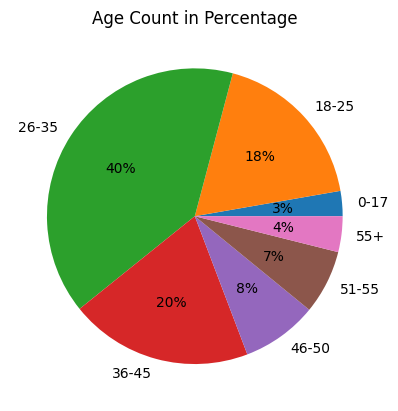

In [20]:
# Question 1: What age group has the highest and lowest purchases?

#Pie chart for Age count
age_pie=data_df.groupby('Age')['Age'].agg('count')
display(age_pie.to_frame())
plt.title('Age Count in Percentage')
plt.pie(age_pie,labels=age_pie.index,radius=1.0,autopct='%.0f%%')
plt.show()

*   Top buyer by age is from 26-35 year accounting for 40% while the bottom buyer are from age 0-17 which is only 3%.
*   78% of the purchase come from people whose age is between 18-45.

<Axes: >

Text(0.5, 1.0, 'Gender')

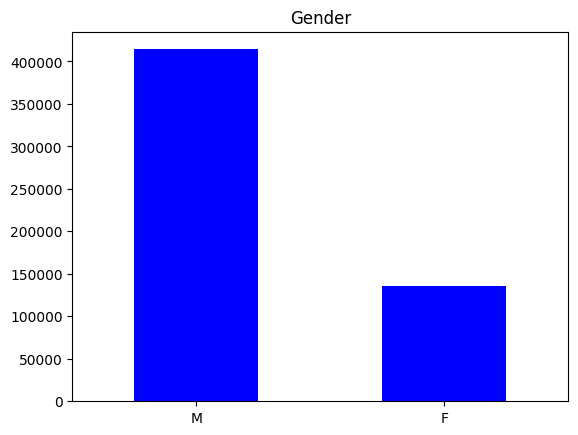

In [20]:
# Question 2: What gender is the top buyer on Black Friday?

#plt.hist(data_df['Gender'])

data_df['Gender'].value_counts().plot(kind='bar',color='blue',rot=0)
plt.title('Gender')

Buyer that is Male in gender is 414259 (about 75%) while the Female count of buyer is 135809 (25 %).

<Axes: >

Text(0.5, 1.0, 'City')

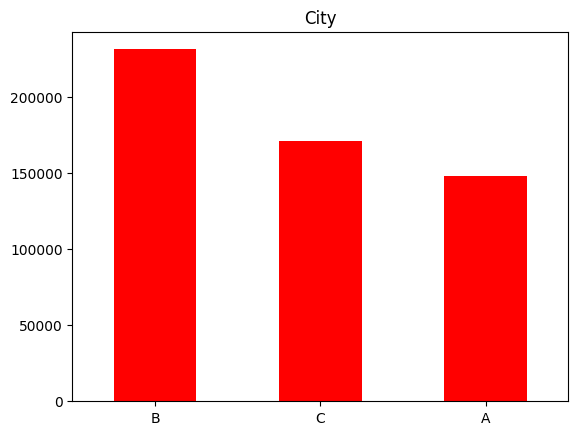

In [21]:
# Question 3: What city category accounts for the most and least purchases?

#plt.hist(data_df['City_Category'])
data_df['City_Category'].value_counts().plot(kind='bar',color='Red',rot=0)
plt.title('City')

,City_Category
City_Category,
A,147720
B,231173
C,171175


Text(0.5, 1.0, 'City category')

([<matplotlib.patches.Wedge at 0x7ce7f02b1960>,
 [Text(0.7311977723577078, 0.8217967009541508, 'A'),
  Text(-1.0901451152986832, 0.14691367393956623, 'B'),
  Text(0.6148894666805983, -0.9120915215948724, 'C')],
 [Text(0.39883514855874963, 0.4482527459749913, '27%'),
  Text(-0.5946246083447362, 0.08013473123976338, '42%'),
  Text(0.33539425455305355, -0.4975044663244758, '31%')])

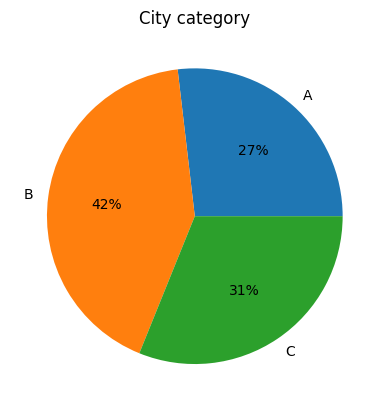

In [23]:
#Pie chart for City category

city_pie = data_df.groupby('City_Category')['City_Category'].agg('count')
display(city_pie.to_frame())
plt.title('City category')
plt.pie(city_pie,labels=city_pie.index,autopct='%.0f%%')
plt.show()

There are 231173 buyer's from "B" category city which is about 42%; while "A" category city accounts for 147720 of buyers which is only 27%.

<Axes: >

Text(0.5, 1.0, 'Marital_Status')

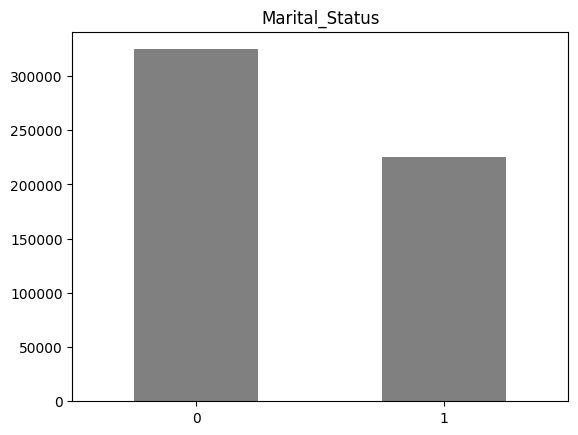

In [23]:
# Question 4: Does marital status have any impact on purchase?

data_df['Marital_Status'].value_counts().plot(kind='bar',color='Gray',rot=0)
plt.title('Marital_Status')

Marital_Status 0 = 324731  ||  Marrital_Status 1 = 225337

*   Buyer's Marital Status 0 are more when compared to status 1.   


<Axes: >

Text(0.5, 1.0, 'Occupation')

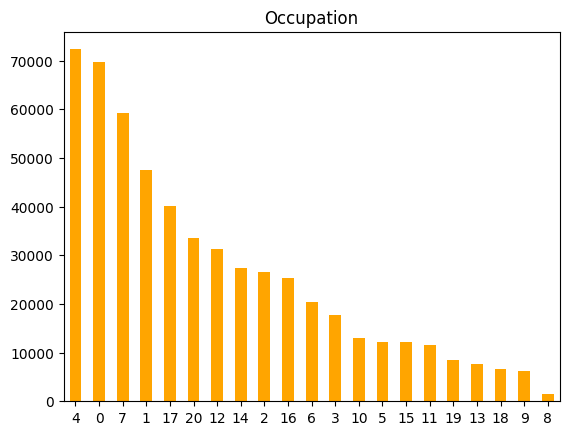

In [15]:
# Question 5: Which occupation category has the most and least purchase?

data_df['Occupation'].value_counts().plot(kind='bar',color='Orange',rot=0)
plt.title('Occupation')

Occupation 8 customers are lowest and occupation 4 are highest.

<Axes: >

Text(0.5, 1.0, 'Years_in_City')

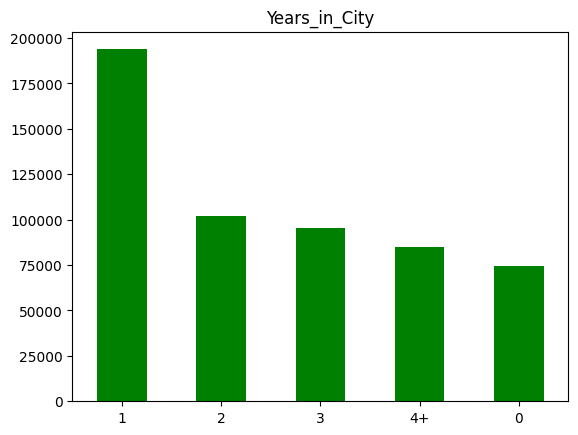

In [18]:
# How does Years in city reflect on the sales?
data_df['Stay_In_Current_City_Years'].value_counts().plot(kind='bar',color='Green',rot=0)
plt.title('Years_in_City')

Most customer has been in the city for about an year.  